CODSOFT Machine Learning Internship

Name: Alka Sharma

Task 2 - CUSTOMER CHURN PREDICTION

The dataset is available at Kaggle: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction



In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential # used for init our ANN model
from tensorflow.keras.layers import Dense # used for different layer structure
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


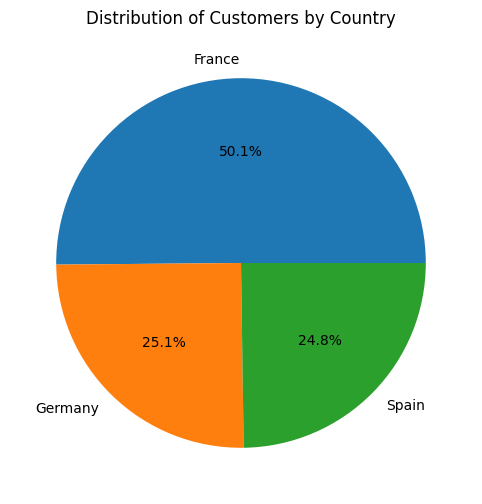

In [ ]:
plt.figure(figsize=(10, 6))
df['Geography'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')  # Remove the y-label
plt.title("Distribution of Customers by Country")
plt.show()

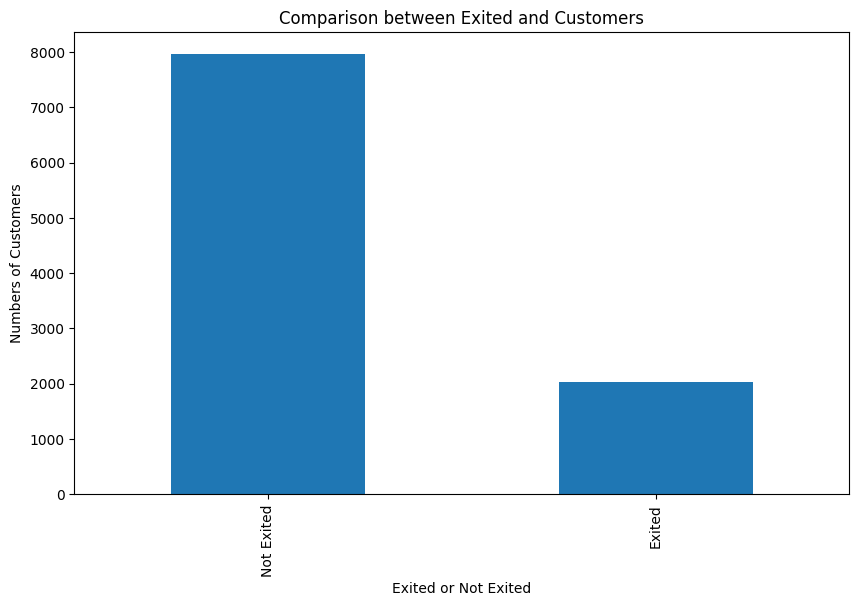

In [ ]:
plt.figure(figsize=(10, 6))
df['Exited'].value_counts().plot(kind='bar')
plt.xlabel('Exited or Not Exited')
plt.ylabel('Numbers of Customers')
plt.title("Comparison between Exited and Customers")
plt.xticks(ticks=[0, 1], labels=['Not Exited', 'Exited'])
plt.show()



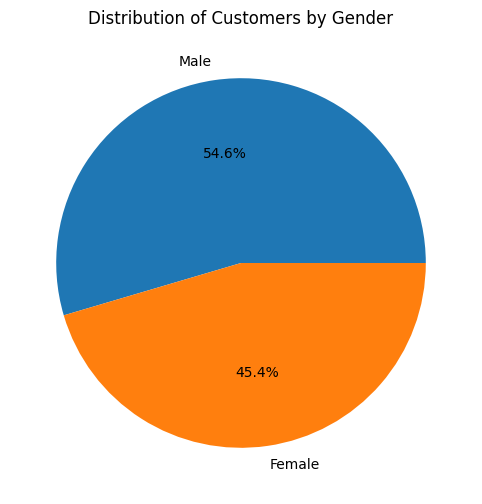

In [ ]:
plt.figure(figsize=(10, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')  # Remove the y-label
plt.title("Distribution of Customers by Gender")
plt.show()

In [ ]:
df= pd.get_dummies(df, columns= ['Geography', 'Gender'], drop_first=True)

In [ ]:
df.drop(columns = ['RowNumber','CustomerId','Surname'], inplace= True )


In [ ]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=3)


In [ ]:
sc=StandardScaler()
# Fit StandardScaler on training data and transform both training and testing data
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


In [ ]:
classifier=Sequential()


In [ ]:
classifier.add(Dense(6,activation='relu',input_dim=11))
classifier.add(Dense(6,activation='relu'))
classifier.add(Dense(1,activation='sigmoid'))


In [ ]:
classifier.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 72        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
history = classifier.fit(X_train_scaled, y_train, batch_size=10, epochs=10, verbose=1, validation_split=0.25)


Epoch 1/10
563/563 [==============================] - 3s 3ms/step - loss: 0.5341 - accuracy: 0.7660 - val_loss: 0.4606 - val_accuracy: 0.8021
Epoch 2/10
563/563 [==============================] - 2s 3ms/step - loss: 0.4482 - accuracy: 0.8027 - val_loss: 0.4348 - val_accuracy: 0.8000
Epoch 3/10
563/563 [==============================] - 2s 3ms/step - loss: 0.4265 - accuracy: 0.8110 - val_loss: 0.4230 - val_accuracy: 0.8101
Epoch 4/10
563/563 [==============================] - 2s 4ms/step - loss: 0.4145 - accuracy: 0.8229 - val_loss: 0.4148 - val_accuracy: 0.8208
Epoch 5/10
563/563 [==============================] - 2s 4ms/step - loss: 0.4055 - accuracy: 0.8302 - val_loss: 0.4094 - val_accuracy: 0.8288
Epoch 6/10
563/563 [==============================] - 1s 2ms/step - loss: 0.3981 - accuracy: 0.8361 - val_loss: 0.4024 - val_accuracy: 0.8299
Epoch 7/10
563/563 [==============================] - 1s 2ms/step - loss: 0.3909 - accuracy: 0.8382 - val_loss: 0.3947 - val_accuracy: 0.8352
Epoch 

In [ ]:
# predicting the test set result
y_pred = classifier.predict(X_test_scaled)
y_pred = (y_pred>0.5)
y_pred


79/79 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

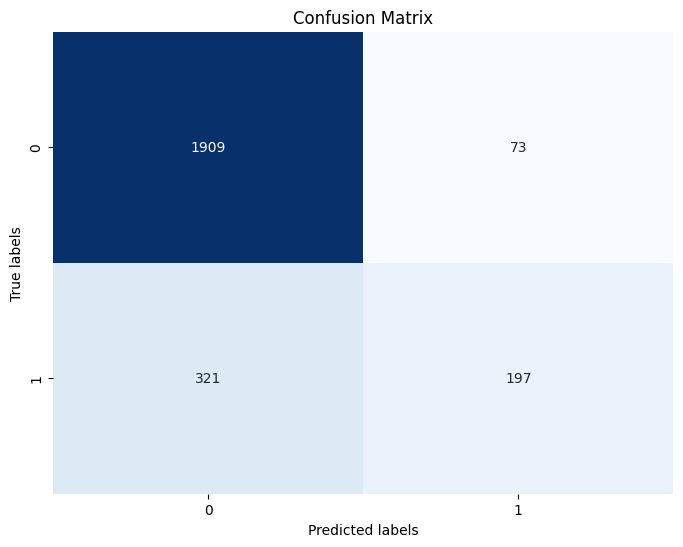

In [ ]:
# Calculate confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.8424

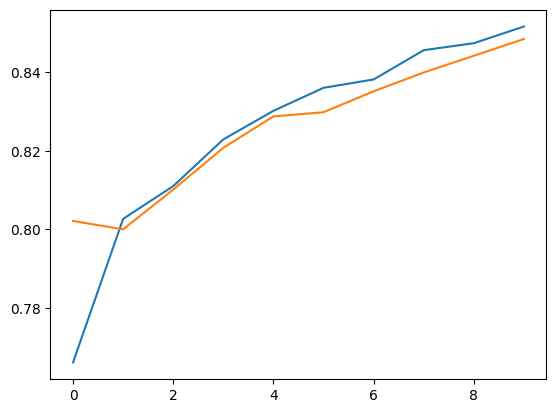

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

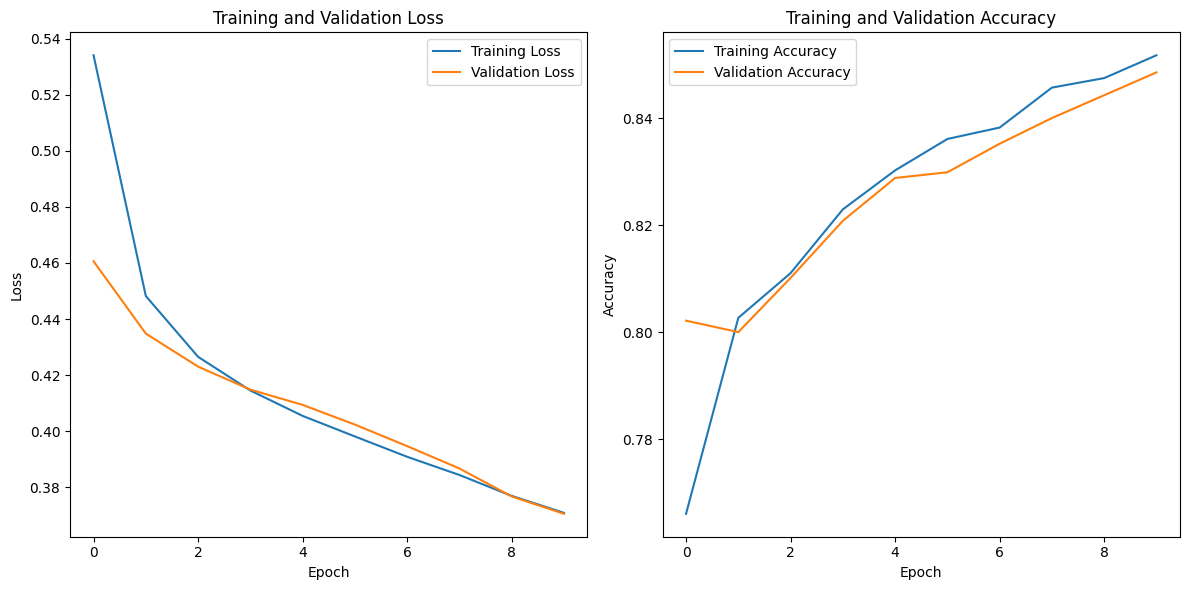

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
